# <center>Challenge 0<center>

<p>Team Name:
<p>Student Names:

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b><br>
seed = 0<br>
a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [30]:
np.random.seed(0)
n = 100

# Create a1
a1_mean = 20
a1_var = 4
a1 = np.random.normal(loc=a1_mean, scale=np.sqrt(a1_var), size=n)

# Create a2
a2_min = 14
a2_max = 26
a2 = np.random.uniform(low=a2_min, high=a2_max, size=n)

# Create dataframe
D = pd.DataFrame({
    'a1': a1,
    'a2': a2
})

print(D)

           a1         a2
0   20.882455  21.072487
1   19.338260  24.976812
2   24.861542  14.717860
3   19.495816  25.579960
4   20.219220  20.851703
..        ...        ...
95  21.576476  25.537610
96  19.109140  18.557341
97  19.035760  19.964124
98  20.987115  18.060064
99  21.000975  22.913009

[100 rows x 2 columns]


x1 = 2*a1<br>
x2 = normal distribution N(mean=40,var=4)<br>
Pr(x1,x2,target) = {(x1, x2, 'P')}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x1,20), shift in x1-dimension by 20 units towards right, data objects with class negative, where
Nr(x1,x2,target) = {(x1_shifted, x2, 'N')}<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [31]:
def rotate(pts, degrees):
    """
    Rotate a given 2D point by a number of degrees with center of rotation at (0,0).
    pts = DataFrame with 2 attributes, representing x1 and x2
    degrees = Angle in the counter-clockwise direction.
    """
    radians = math.radians(degrees)
    R = []
    for x1, x2 in pts:
        rx1 = x1 * math.cos(radians) - x2 * math.sin(radians)
        rx2 = x1 * math.sin(radians) + x2 * math.cos(radians)
        R.append((rx1, rx2))
    #
    return R
#

def shift(pts, axis, shiftValue):
    """
    Shift a given 2D point by a set value on either axis.
    pts = DataFrame with 2 attributes, representing x1 and x2
    axis = Either x1 or x2
    shiftValue = Value to shift by on either axis
    """
    S = []
    # Shift on x1 axis
    if axis == 'x1':
        for x1, x2 in pts:
            sx1 = x1 + shiftValue
            S.append((sx1, x2))
        #
    elif axis == 'x2':
        for x1, x2 in pts:
            sx2 = x2 + shiftValue
            S.append((x1, sx2))
        #
    else:
        print('Invalid axis provided to function shift().')
        sys.exit()
    #
    return S
#

# Create x1
D['x1'] = 2 * D['a1']

# Create x2
x2_mean = 40
x2_var = 4
D['x2'] = np.random.normal(loc=x2_mean, scale=np.sqrt(x2_var), size=len(D))

# Create Pr
Pr = D[['x1', 'x2']].copy()
Pr['target'] = 'P'

# Create P
Pr_x = Pr[['x1', 'x2']].values
Pr_x_rotate = rotate(Pr_x, 45)
P = pd.DataFrame(Pr_x_rotate, columns=['x1', 'x2'])

# Create Nr
Pr_x_shift = shift(Pr_x, 'x1', 20)
Nr = pd.DataFrame(Pr_x_shift, columns=['x1', 'x2'])
Nr['target'] = 'N'

# Create N
Nr_x = Nr[['x1', 'x2']].values
Nr_x_rotate = rotate(Nr_x, 45)
N = pd.DataFrame(Nr_x_rotate, columns=['x1', 'x2'])

print('\nDataFrame P =========================')
print(P)
print('\nDataFrame Pr =========================')
print(Pr)
print('\nDataFrame D =========================')
print(D)
print('\nDataFrame Nr =========================')
print(Nr)
print('\nDataFrame N =========================')
print(N)


DataFrame P =========================
          x1         x2
0  -0.104379  59.168881
1  -0.032852  54.729710
2   7.077670  63.241390
3  -0.395972  55.538466
4   1.778678  55.409912
..       ...        ...
95  3.988748  57.038741
96 -2.149237  56.198047
97 -0.761764  54.603023
98 -0.022761  59.383287
99  2.516101  56.883625

[100 rows x 2 columns]

DataFrame Pr =========================
           x1         x2 target
0   41.764910  41.912524      P
1   38.676519  38.722979      P
2   49.723085  39.713747      P
3   38.991631  39.551620      P
4   40.438439  37.923010      P
..        ...        ...    ...
95  43.152952  37.512010      P
96  38.218280  41.257761      P
97  38.071519  39.148816      P
98  41.974231  42.006419      P
99  42.001949  38.443645      P

[100 rows x 3 columns]

DataFrame D =========================
           a1         a2         x1         x2
0   20.882455  21.072487  41.764910  41.912524
1   19.338260  24.976812  38.676519  38.722979
2   24.861542  14.717

### Merge Data

Merge Pr and Nr into a single set PNr. 

In [32]:
PNr = pd.concat([Pr, Nr], ignore_index=True)

print(PNr)

            x1         x2 target
0    41.764910  41.912524      P
1    38.676519  38.722979      P
2    49.723085  39.713747      P
3    38.991631  39.551620      P
4    40.438439  37.923010      P
..         ...        ...    ...
195  63.152952  37.512010      N
196  58.218280  41.257761      N
197  58.071519  39.148816      N
198  61.974231  42.006419      N
199  62.001949  38.443645      N

[200 rows x 3 columns]


# PART II

## Visualize Data
The axis scale should be the same. The class-P and -N data points will in red-circle and blue-triangle, respectively.

Plot Pr and P in the same figure on a separate sub-plots of 1 by 2:

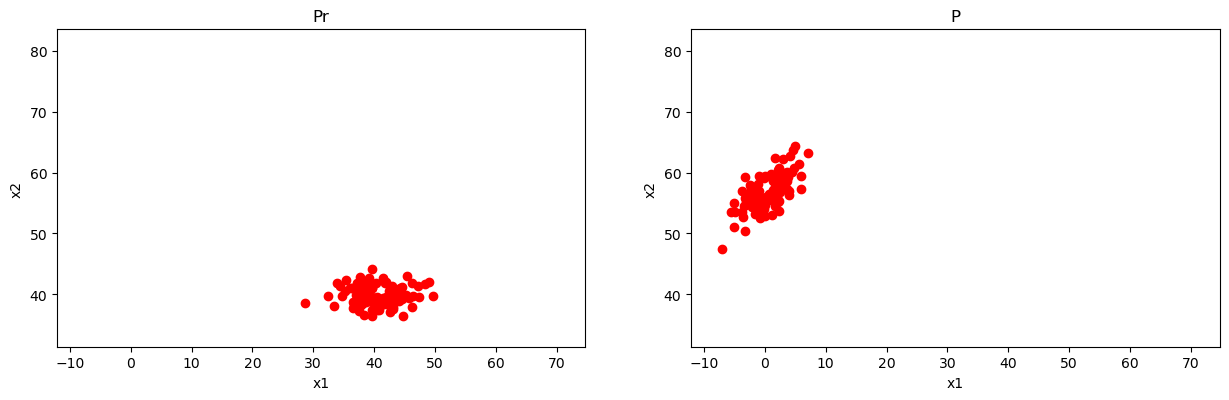

In [33]:
dfs = [P, Pr, N, Nr]

x_min, x_max = np.min([df['x1'].min() for df in dfs]) - 5, np.max([df['x1'].max() for df in dfs]) + 5
y_min, y_max = np.min([df['x2'].min() for df in dfs]) - 5, np.max([df['x2'].max() for df in dfs]) + 5

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

scatter_plot_params = {
    'xlabel': 'x1',
    'ylabel': 'x2',
    'xlim': (x_min, x_max),
    'ylim': (y_min, y_max),
    'aspect': 'equal'
}

for ax, (df, title) in zip(axs, [(Pr, 'Pr'), (P, 'P')]):
    ax.scatter(df['x1'], df['x2'], c='r', marker='o',label=title)
    ax.set_title(title)
    ax.set(**scatter_plot_params)

plt.show()

Plot Nr and N in the same figure on a separate sub-plots of 1 by 2:

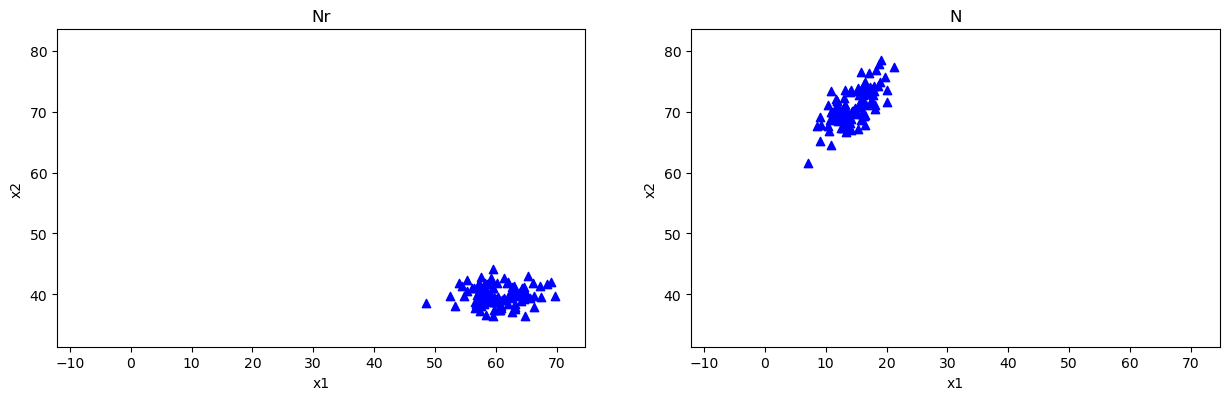

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for ax, (df, title) in zip(axs, [(Nr, 'Nr'), (N, 'N')]):
    ax.scatter(df['x1'], df['x2'], c='b', marker='^',label=title)
    ax.set_title(title)
    ax.set(**scatter_plot_params)

plt.show()

Plot {PNr}:

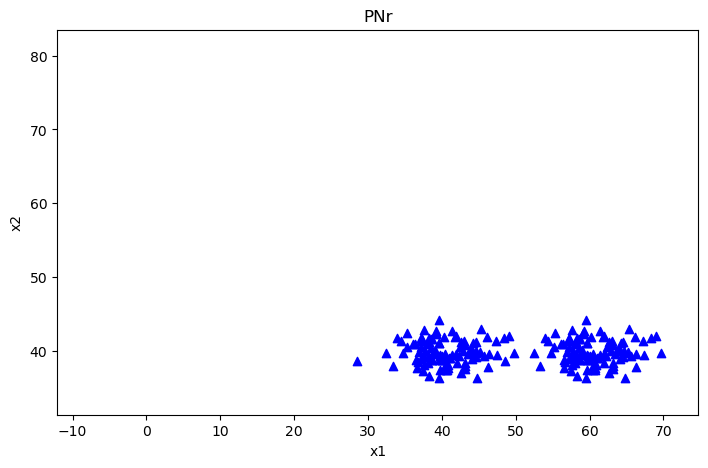

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

for ax, (df, title) in zip([axs], [(PNr, 'PNr')]):
    ax.scatter(df['x1'], df['x2'], c='b', marker='^', label=title)
    ax.set_title(title)
    ax.set(**scatter_plot_params)

plt.show()

# PART III

## Simple Classifier

Classifier SimpleClassifier:
Given data D(x1, x2),<br>
If x1 + x2 > median, then predicted class<br>
...    <b>N</b><br>
Else<br>
...    <b>P</b>

Obtain predicted class labels using SimpleClassifier:

In [36]:
PNr['sum'] = PNr['x1'] + PNr['x2']
threshold = PNr['sum'].median()

PNr_predicted_classifier = np.where(PNr['sum'] > threshold, 'N', 'P')
PNr['Predicted_Classifier'] = PNr_predicted_classifier

print(PNr[['x1', 'x2', 'Predicted_Classifier']])

            x1         x2 Predicted_Classifier
0    41.764910  41.912524                    P
1    38.676519  38.722979                    P
2    49.723085  39.713747                    P
3    38.991631  39.551620                    P
4    40.438439  37.923010                    P
..         ...        ...                  ...
195  63.152952  37.512010                    N
196  58.218280  41.257761                    N
197  58.071519  39.148816                    N
198  61.974231  42.006419                    N
199  62.001949  38.443645                    N

[200 rows x 3 columns]


Print output Y(x1,x2,True_Target, Predicted_Target)

In [37]:
print("PNr(x1, x2, True_Target, Predicted_Target)")

for i in range(len(PNr)):
    x1 = PNr.loc[i, 'x1']
    x2 = PNr.loc[i, 'x2']
    true_target = PNr.loc[i, 'target']
    predicted_target = PNr.loc[i, 'Predicted_Classifier']

    print("PNr({}, {}, {}, {})".format(x1, x2, true_target, predicted_target))


PNr(x1, x2, True_Target, Predicted_Target)
PNr(41.76490994754017, 41.91252371476154, P, P)
PNr(38.67651939242365, 38.722978889158995, P, P)
PNr(49.72308474803112, 39.713747164685714, P, P)
PNr(38.99163148158769, 39.55162033485495, P, P)
PNr(40.43843936631273, 37.92300951978128, P, P)
PNr(46.329924468246254, 39.65658190312141, P, P)
PNr(36.36307038057503, 40.952692352693624, P, P)
PNr(37.63345336827884, 39.17164346882419, P, P)
PNr(40.75041290334814, 37.471833313713006, P, P)
PNr(38.680520168882566, 38.853568887972344, P, P)
PNr(35.228941550312776, 40.49963463184244, P, P)
PNr(39.18049395764965, 42.294404163229835, P, P)
PNr(38.56468421199503, 41.67188791354441, P, P)
PNr(42.41388641043798, 40.57480729007686, P, P)
PNr(33.34084588211322, 38.008807402173666, P, P)
PNr(37.199283849240196, 41.81377893513187, P, P)
PNr(44.60556403794868, 40.04842148877225, P, P)
PNr(47.42932402892525, 39.520036530617915, P, P)
PNr(33.95528176924654, 41.82022112781362, P, P)
PNr(42.57939004357112, 41.2356895

Plot output Y. Use the same marker shape. Predicted Target colors: P in Red and N in blue.

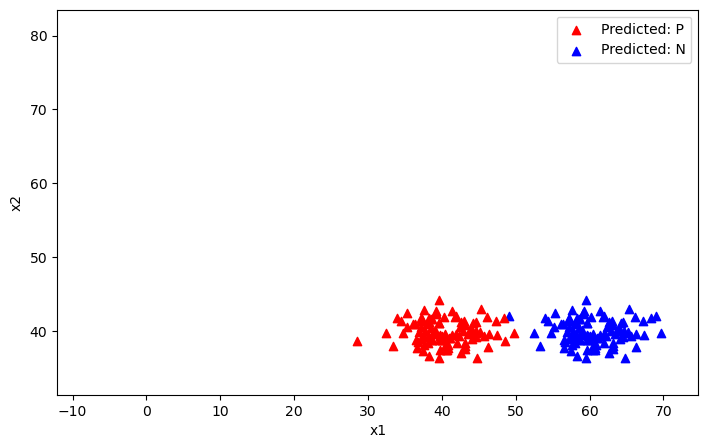

In [38]:
plt.figure(figsize=(15, 5))

for i in range(len(PNr)):
    x1 = PNr.loc[i, 'x1']
    x2 = PNr.loc[i, 'x2']
    predicted_target = PNr.loc[i, 'Predicted_Classifier']

    color = 'red' if predicted_target == 'P' else 'blue'
    plt.scatter(x1, x2, color=color, marker='^')

plt.xlabel(scatter_plot_params['xlabel'])
plt.ylabel(scatter_plot_params['ylabel'])
plt.xlim(scatter_plot_params['xlim'])
plt.ylim(scatter_plot_params['ylim'])
plt.gca().set_aspect(scatter_plot_params['aspect'])

plt.scatter([], [], color='red', marker='^', label='Predicted: P')
plt.scatter([], [], color='blue', marker='^', label='Predicted: N')
plt.legend()

plt.show()

Obtain the Confusion Matrix and print:

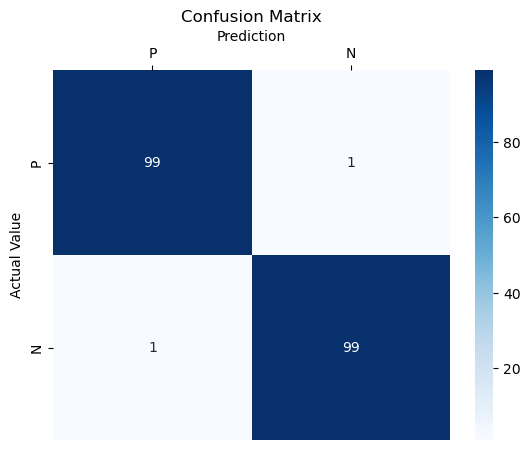

In [39]:
actual_value = PNr['target']
prediction = PNr['Predicted_Classifier']

cm = confusion_matrix(actual_value, prediction, labels=['P', 'N'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['P', 'N'], yticklabels=['P', 'N'])
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix')
plt.gca().xaxis.set_label_position('top') 
plt.gca().xaxis.tick_top()
plt.show()


Claculate the Performance Scores of Accuracy, Recall (Sensitivity), Specificity, F1-score. Plot as bar-chart:

In [40]:
TP = cm[0, 0] 
FP = cm[0, 1]  
FN = cm[1, 0]  
TN = cm[1, 1] 

accuracy = (TP + TN) / (TP + TN + FP + FN)

recall = TP / (TP + FN) if TP + FN != 0 else 0

specificity = TN / (TN + FP) if TN + FP != 0 else 0

precision = TP / (TP + FP) if TP + FP != 0 else 0

f1 = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9900
Recall (Sensitivity): 0.9900
Specificity: 0.9900
F1-score: 0.9900


## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

references: 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

https://www.w3schools.com/python/ref_func_zip.asp

https://docs.python.org/3.3/library/functions.html#zip

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

https://www.geeksforgeeks.org/confusion-matrix-machine-learning/#

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://www.geeksforgeeks.org/compute-classification-report-and-confusion-matrix-in-python/

https://keylabs.ai/blog/how-to-use-a-confusion-matrix-for-model-evaluation/